# Getting The System Readdy

In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



## Loading The Data

In [645]:
df = pd.read_csv('../data/USA Housing Dataset.csv')

In [646]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


# Inspecting The Data


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [648]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


# Exploratory Data Analysis


## Identifying Output Variable


In [649]:
out_var = 'price'
features = df.columns.drop(out_var).tolist()


## Categorical Features

In [650]:
# identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_features)
display(df.describe(include='object').T)

['date', 'street', 'city', 'statezip', 'country']


,count,unique,top,freq
date,4140,68,2014-06-23 00:00:00,142
street,4140,4079,2520 Mulberry Walk NE,4
city,4140,43,Seattle,1415
statezip,4140,77,WA 98103,128
country,4140,1,USA,4140


Features like street and country provide little value—street has too many unique values, and country has only one value—so these can be dropped. Date and statezip columns can also be discarded to streamline the dataset.
The city feature is useful for regional trends and should be encoded (e.g., one-hot or label encoding).

## Numerical Features

In [651]:
numeric_data = df.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_data if col != out_var]
print(numeric_features)
display(df.describe(include='number').T)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


## Numerical Data Analysis

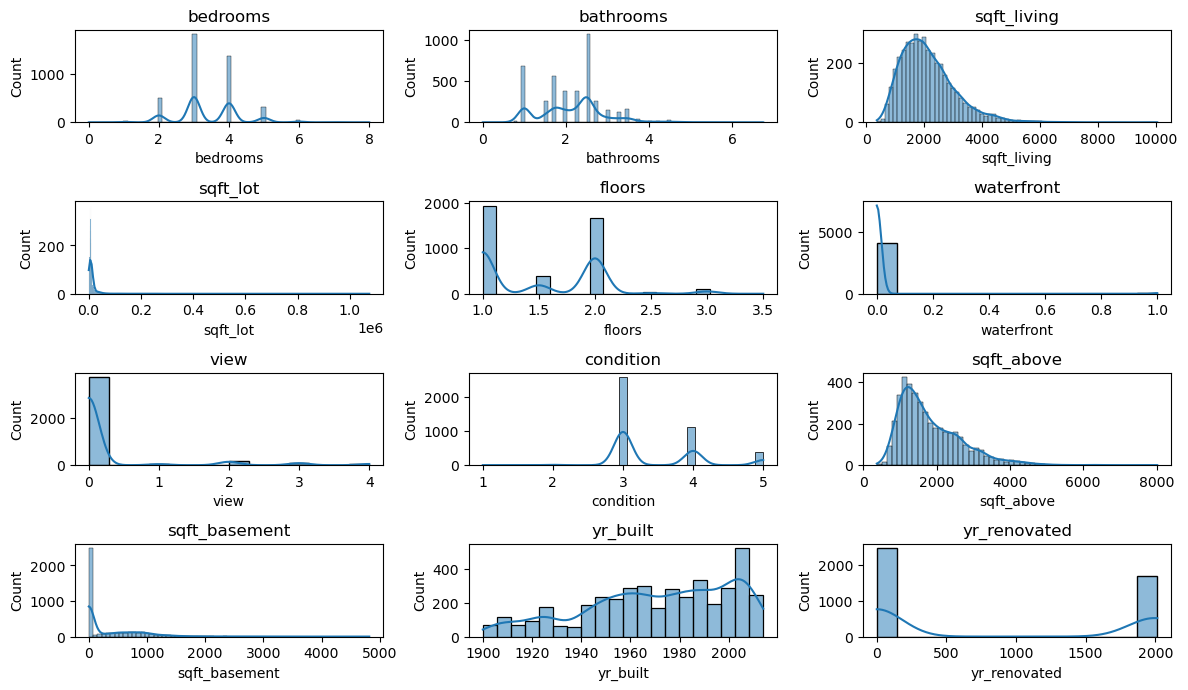

In [652]:
numerical_cols = df[features].select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

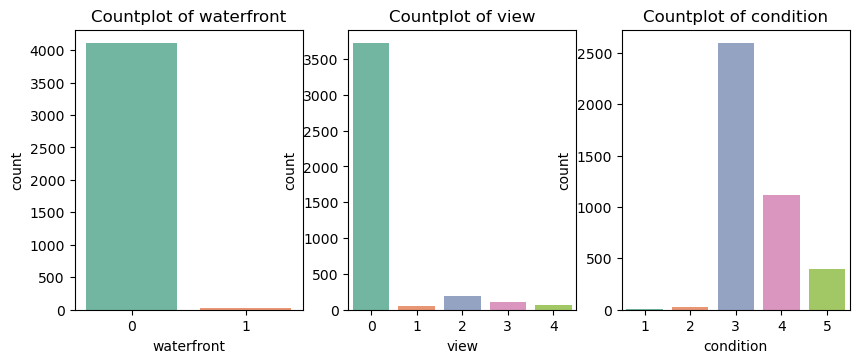

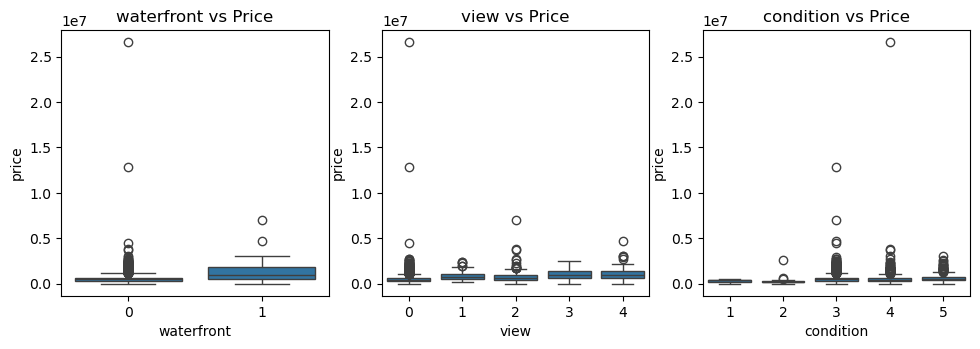

In [653]:
categorical_cols = ['waterfront', 'view', 'condition']  # adjust as needed

plt.figure(figsize=(10,8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=df, palette='Set2', hue=col,legend=False)
    plt.title(f'Countplot of {col}')
plt.show()
plt.figure(figsize=(20,20))

for i, col in enumerate(categorical_cols):
    # Boxplot to see effect on price
    plt.subplot(5,5,i+1)
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
plt.show()

The counts of both houeses with a waterfront and houses with a view rating larger than is minimal, and can therfore be dropped with the reason that they will have a small impact on the overall result.
Outliers are detected in the box plots. There seems to be a few houses with a very high price. These houses are likely to be outliers and can be removed.

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_9500\701093818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


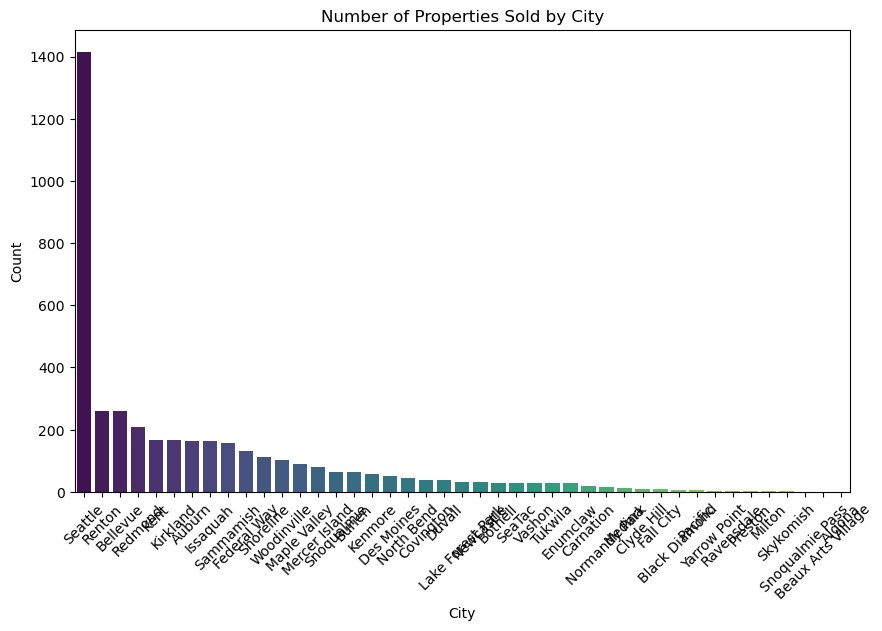

In [654]:
plt.figure(figsize=(10, 6))
city_counts = df['city'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title('Number of Properties Sold by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Based on the counts of houses in each city, Seattle emerges as the dominant market, with approximately 1400 sales—far surpassing other cities like Bellevue, Renton, and Kent, which have fewer than 200 sales each. Smaller cities have even fewer transactions, most with sales below 100.

In [655]:
city_counts = df['city'].value_counts()
df['city_frequency'] = df['city'].map(city_counts)

## Correlation Matrix for Price

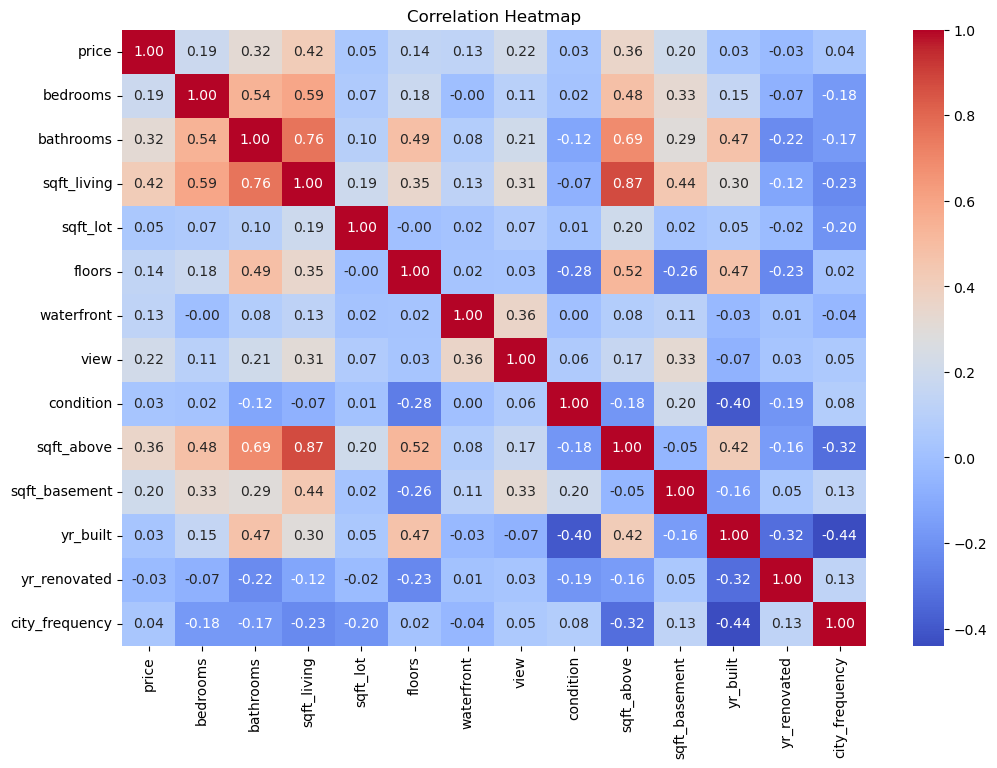

In [656]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

City may be considered for removal from the data as it has little to no correlation with the other variables.

## Box Plots

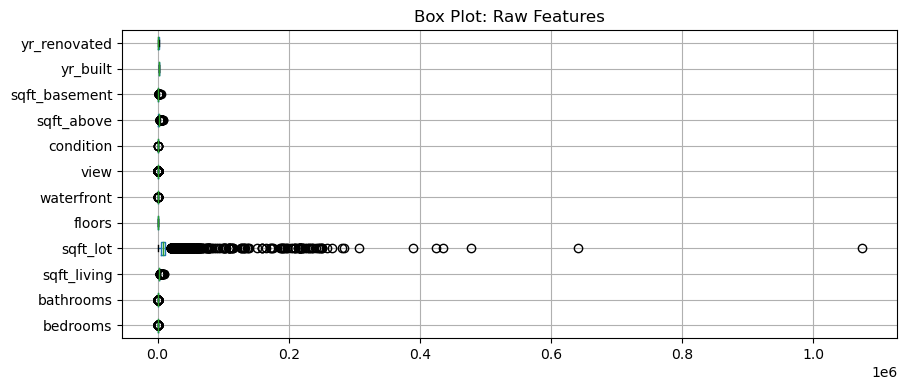

In [657]:
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df[features].boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Raw Features')

# Data Preperation

## Outlier Removal Through Z-Score

In [658]:
from scipy.stats import zscore

df['zscore_price'] = zscore(df['price'])  # Add Z-scores for price
df = df[df['zscore_price'].abs() <= 3]   # Remove outliersz

## Feature Engineering

### Scaling Features

In [659]:
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']
df['house_age'] = 2025 - df['yr_built']
df['is_renovated'] = np.where(df['yr_renovated'] > 0, 1, 0)

df = df.drop(['yr_renovated', 'waterfront', 'view', 'yr_built', 'sqft_living','sqft_basement','sqft_above', 'sqft_lot', 'city_frequency'], axis=1)

In [660]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['total_sqft_scaled', 'price_per_sqft_scaled', 'house_age']] = scaler.fit_transform(df[['total_sqft', 'price_per_sqft', 'house_age']])
df = df.drop(['total_sqft','price_per_sqft'], axis=1)

df['zscore_price'] = zscore(df['price'])  # Add Z-scores for price
df = df[df['zscore_price'].abs() <= 3] # Remove outliersz
df.drop(columns=['zscore_price'], inplace=True)

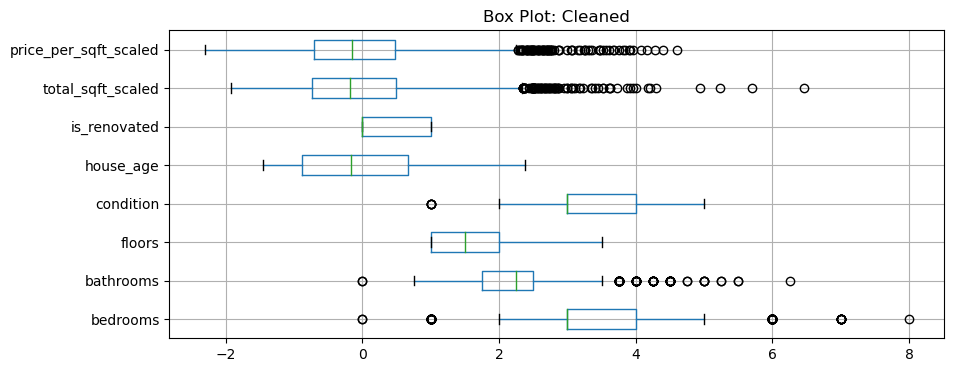

In [661]:
features = df.columns.drop(out_var).tolist()
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df[features].boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Cleaned')

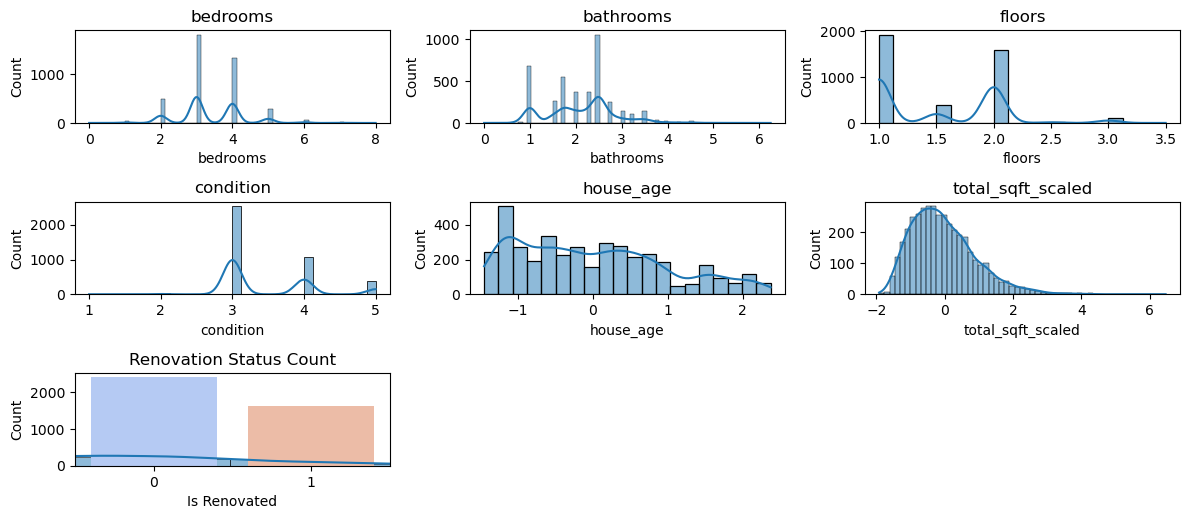

In [674]:
numerical_cols = df[features].select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

sns.countplot(x='is_renovated', data=df, palette="coolwarm", hue = 'is_renovated', legend= False)
plt.title('Renovation Status Count')
plt.xlabel('Is Renovated')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

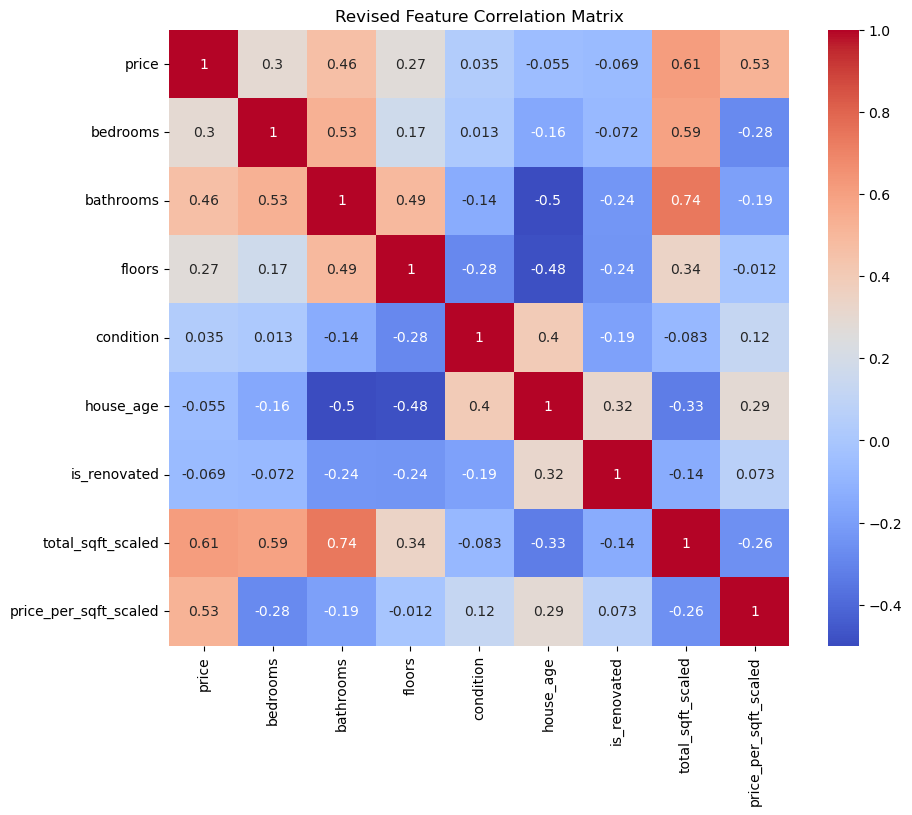

In [664]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Revised Feature Correlation Matrix")
plt.show()

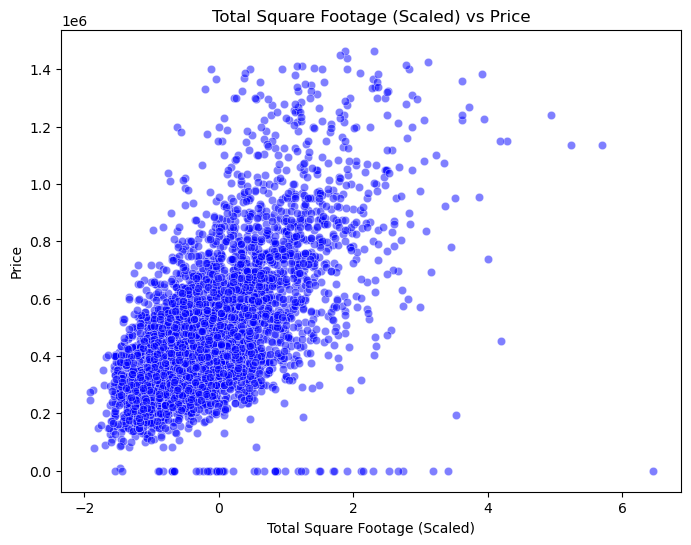

In [665]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft_scaled', y='price', data=df, alpha=0.5, color='blue')
plt.title('Total Square Footage (Scaled) vs Price')
plt.xlabel('Total Square Footage (Scaled)')
plt.ylabel('Price')
plt.show()

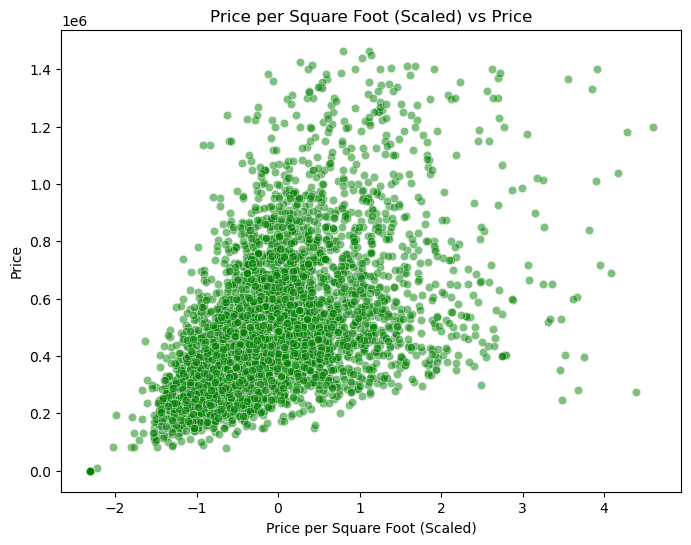

In [666]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_per_sqft_scaled', y='price', data=df, alpha=0.5, color='green')
plt.title('Price per Square Foot (Scaled) vs Price')
plt.xlabel('Price per Square Foot (Scaled)')
plt.ylabel('Price')
plt.show()

In [678]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4033.0,503698.400606,256341.698323,0.000000,317000.000000,452000.000000,640000.000000,1.465000e+06
bedrooms,4033.0,3.378626,0.892100,0.000000,3.000000,3.000000,4.000000,8.000000e+00
bathrooms,4033.0,2.128998,0.747964,0.000000,1.750000,2.250000,2.500000,6.250000e+00
floors,4033.0,1.505703,0.534376,1.000000,1.000000,1.500000,2.000000,3.500000e+00
condition,4033.0,3.448797,0.675477,1.000000,3.000000,3.000000,4.000000,5.000000e+00
house_age,4033.0,-0.002672,0.997946,-1.450167,-0.879757,-0.175133,0.663706,2.374937e+00
is_renovated,4033.0,0.404909,0.490935,0.000000,0.000000,0.000000,1.000000,1.000000e+00
total_sqft_scaled,4033.0,-0.042159,0.950516,-1.922887,-0.738764,-0.179594,0.489217,6.464657e+00
price_per_sqft_scaled,4033.0,-0.040721,0.932525,-2.311257,-0.710433,-0.156738,0.470097,4.600676e+00
